## Mount Google Drive

This cell mounts your Google Drive to the Colab environment, allowing you to access and manipulate files stored in your Google Drive.

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Pre-trained Models
This cell is responsible for loading pre-trained models into the environment. Different models trained with either PyTorch or TensorFlow/Keras are loaded for various tasks such as object detection and image classification.

### -YOLO for image detection 
### -CNN, VGG16 and Restnet0 for image classification 

In [31]:
import pandas as pd
import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import torch
import os


# Load YOLO model using PyTorch (if trained with PyTorch)
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/Yolo_training/yolov5/runs/train/Model5/weights/best.pt')


# Load models using Keras (if trained with TensorFlow/Keras)
cnn_model = load_model('/content/drive/MyDrive/corals_dataset/cnn_coral_classifier.h5')
vgg16_model = load_model('/content/drive/MyDrive/corals_dataset/vgg16_coral_classifier.h5')
resnet50_model = load_model('/content/drive/MyDrive/corals_dataset/resnet50_coral_classifier.h5')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-5-29 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Function to Detect and Count Fish in a Given Image

This function, detect_and_count_fish, is designed to detect and count the number of fish in a specified image using a pre-trained YOLO model.

## Steps Involved
#### 1- Read and Resize Image
#### 2- Detect Objects
#### 3- Extract and Filter Results
#### 4- Count and Display Fish
#### 5- Return Fish Count

In [33]:
# Function to detect and count fish in a given image
def detect_and_count_fish(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Ensure the image is loaded successfully
    if img is None:
        print(f"Error: Could not read image {image_path}.")
        return 0

    # Resize image for better detection
    img_resized = cv2.resize(img, (540, 540))

    # Use the yolo_model to detect objects
    results = yolo_model(img_resized)

    # Extract detection results
    detections = results.pandas().xyxy[0]

    # Filter results to identify fish only (assuming fish class is 0)
    fish_detections = detections[detections['class'] == 0]

    # Count the number of fish
    num_fish = len(fish_detections)

    # Print the number of detected fish
    print(f"Number of fish detected in {os.path.basename(image_path)}: {num_fish}")

    # Display the resized image with bounding boxes
    results.show()

    return num_fish

## Function to Apply Coral Classification Model
This function, classify_coral, classifies a coral image as "healthy" or "bleached" using pre-trained CNN, VGG16, and ResNet50 models. The image is resized to 224x224 pixels, expanded to match model input, and predictions are made using each model. The final classification is based on the average prediction, with a result of "healthy" if the probability is above 0.5, otherwise "bleached".

In [34]:
# Function to apply coral classification model
def classify_coral(image):
    # Resize the image
    image_resized = cv2.resize(image, (224, 224))
    # Expand dimensions to match model input shape
    image_array = np.expand_dims(image_resized, axis=0)

    # Predictions using each model
    cnn_prediction = cnn_model.predict(image_array)[0]
    vgg16_prediction = vgg16_model.predict(image_array)[0]
    resnet50_prediction = resnet50_model.predict(image_array)[0]

    # Calculate final prediction (you can use mean or majority vote)
    final_prediction = np.mean([cnn_prediction, vgg16_prediction, resnet50_prediction])

    # Assume the model gives the probability of coral being healthy
    coral_health = 'healthy' if final_prediction > 0.5 else 'bleached'
    return coral_health


## Processing and Analyzing Images
This cell iterates through a list of image paths, detecting fish and classifying coral health. For each image, it determines the number of fish present and evaluates the coral's health status. Results are stored and converted into a DataFrame for further analysis.







Number of fish detected in 01.jpg: 4


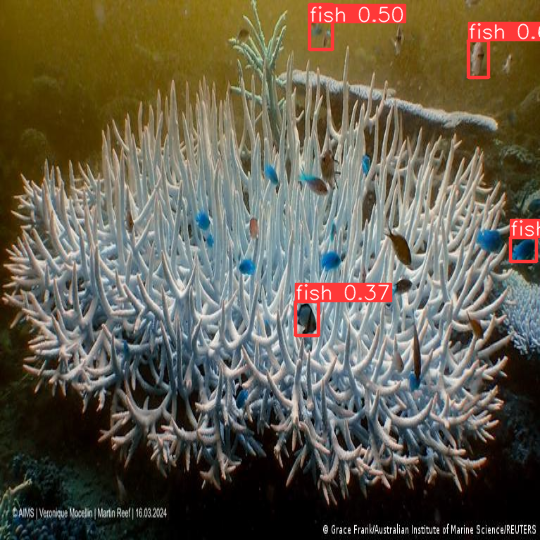

1/1 [==============================] - 0s 234ms/step
Number of fish detected in 02.jpg: 3


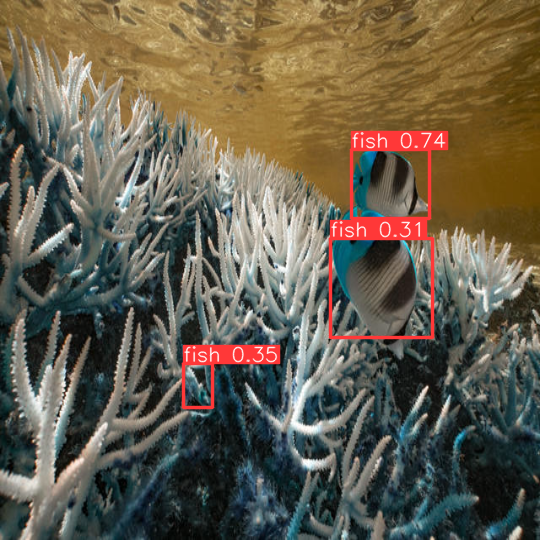

1/1 [==============================] - 0s 239ms/step
Number of fish detected in 03.jpg: 9


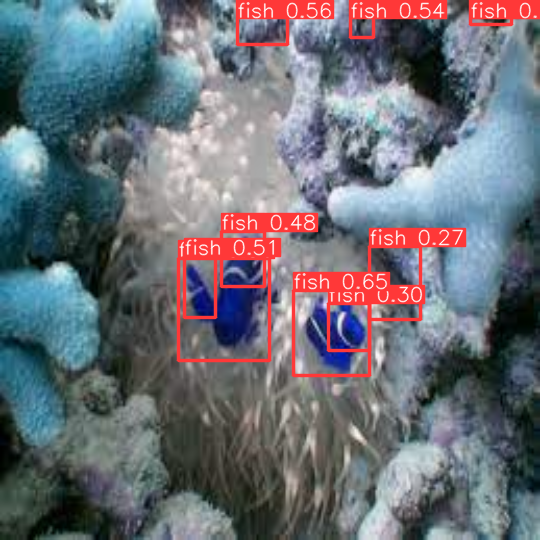

1/1 [==============================] - 0s 390ms/step
Number of fish detected in 04.jpg: 1


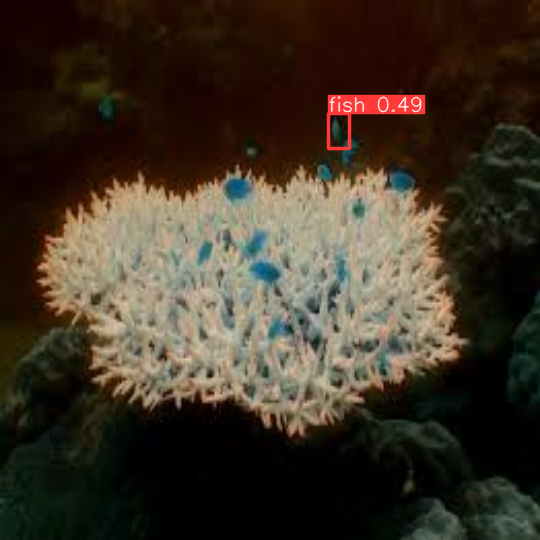

1/1 [==============================] - 0s 358ms/step
Number of fish detected in 05.jpg: 3


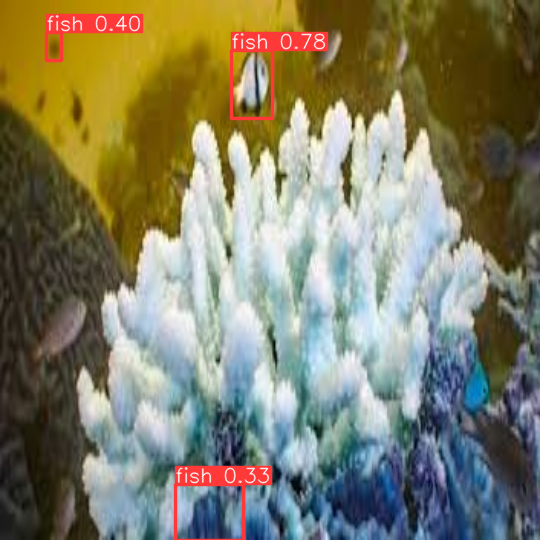

1/1 [==============================] - 0s 224ms/step
Number of fish detected in 06.jpg: 36


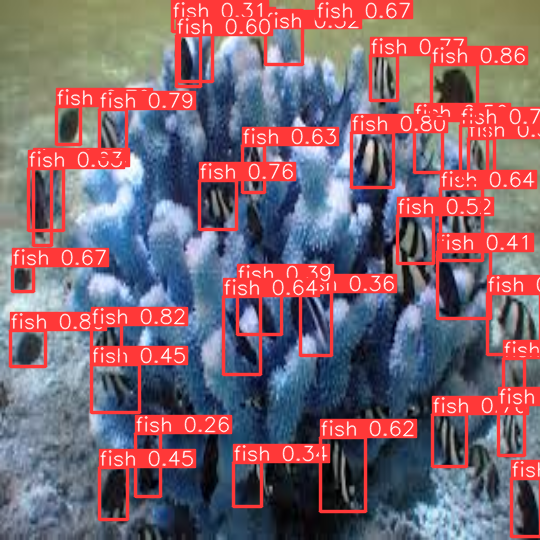

1/1 [==============================] - 0s 215ms/step
Number of fish detected in 07.jpg: 1


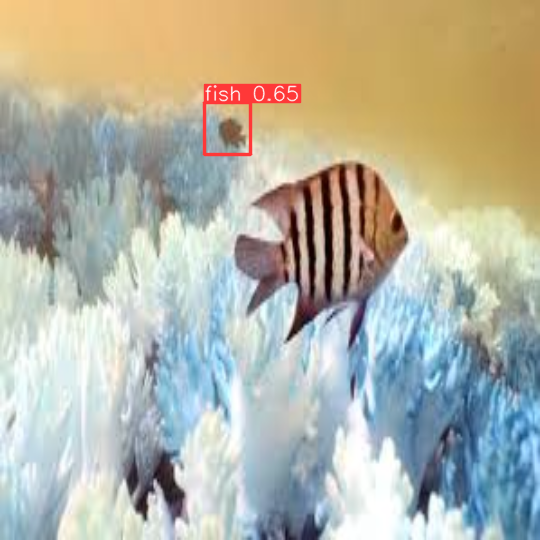

1/1 [==============================] - 0s 228ms/step
Number of fish detected in 08.jpg: 2


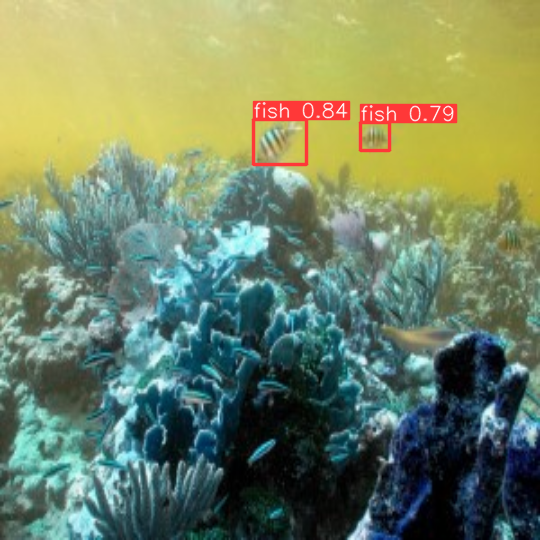

1/1 [==============================] - 0s 233ms/step
  image_id  num_fish coral_health
0   01.jpg         4     bleached
1   02.jpg         3     bleached
2   03.jpg         9     bleached
3   04.jpg         1     bleached
4   05.jpg         3     bleached
5   06.jpg        36     bleached
6   07.jpg         1     bleached
7   08.jpg         2      healthy


In [38]:
# List to store results
results = []

# Load and test images
image_paths = ['/content/drive/MyDrive/Bleashed_Coral&Fishes/01.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/02.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/03.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/04.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/05.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/06.jpg',
               '/content/drive/MyDrive/Bleashed_Coral&Fishes/07.jpg',
               '/content/drive/MyDrive/corals_dataset/healthy_corals/08.jpg']

for image_path in image_paths:
    # Detect fish in the image
    num_fish = detect_and_count_fish(image_path)
    # Load the image
    image = cv2.imread(image_path)
    # Classify coral health
    coral_health = classify_coral(image)

    # Extract only the filename from the image_path
    filename = os.path.basename(image_path)

    # Append results to the list
    results.append({'image_id': filename, 'num_fish': num_fish, 'coral_health': coral_health})

# Convert results to DataFrame
df = pd.DataFrame(results)

# Analyze the results
print(df)

